<a href="https://colab.research.google.com/github/Ljmarcer/Tensorflow_clothes/blob/main/Image_Classification_Clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Clasifier
> This was one of my first projects in deep learning with tensorflow 

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info= True)

In [ ]:
train_data, test_data = data['train'], data['test']

In [ ]:
classes = metadata.features['label'].names
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Data norm for better input
def norm(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255 
  return images, labels
train_data = train_data.map(norm)
test_data = test_data.map(norm)
 # CACHE
train_data = train_data.cache()
test_data = test_data.cache()

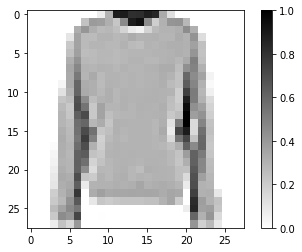

In [ ]:
#Show train data image 
for image, label in train_data.take(2):
  break
image = image.numpy().reshape((28,28)) 

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

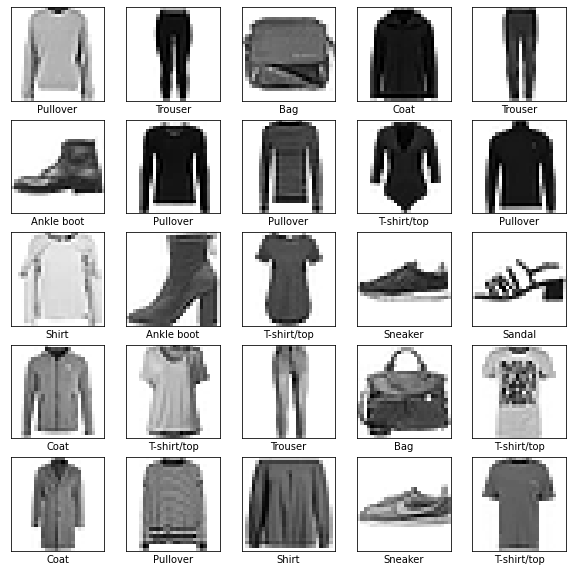

In [ ]:
#Few more examples
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_data.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(classes[label])
plt.show()

## Build the model
> we are going to use 4 layers, input layer flatten of the image , 2 relus for interconection and softwmax for decision.

In [ ]:
#Build the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), 
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [ ]:
#number of samples train and test (60k y 10k)
num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples

In [ ]:
#Compile the mode
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

## Train the model

In [ ]:
#Batch Size 32
Batch_Size = 32

#Shuffle y repeat hacen que los data esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
train_data = train_data.repeat().shuffle(num_train_examples).batch(Batch_Size)
test_data = test_data.batch(Batch_Size)

In [ ]:
import math

#Fit the mode
history = model.fit(train_data, epochs=40, steps_per_epoch= math.ceil(num_train_examples/Batch_Size))

Epoch 1/40
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5116 - accuracy: 0.8188
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3859 - accuracy: 0.8612
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3493 - accuracy: 0.8736
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3275 - accuracy: 0.8803
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3084 - accuracy: 0.8868
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2973 - accuracy: 0.8890
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2886 - accuracy: 0.8925
Epoch 8/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2746 - accuracy: 0.8984
Epoch 9/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2672 - accuracy: 0.9008
Epoch 10/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.26

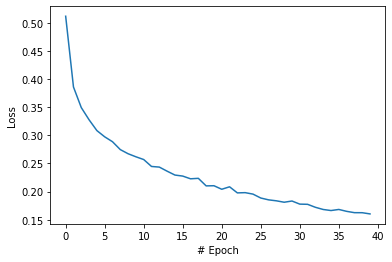

In [ ]:
#Loss function
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])

## Predictions on test

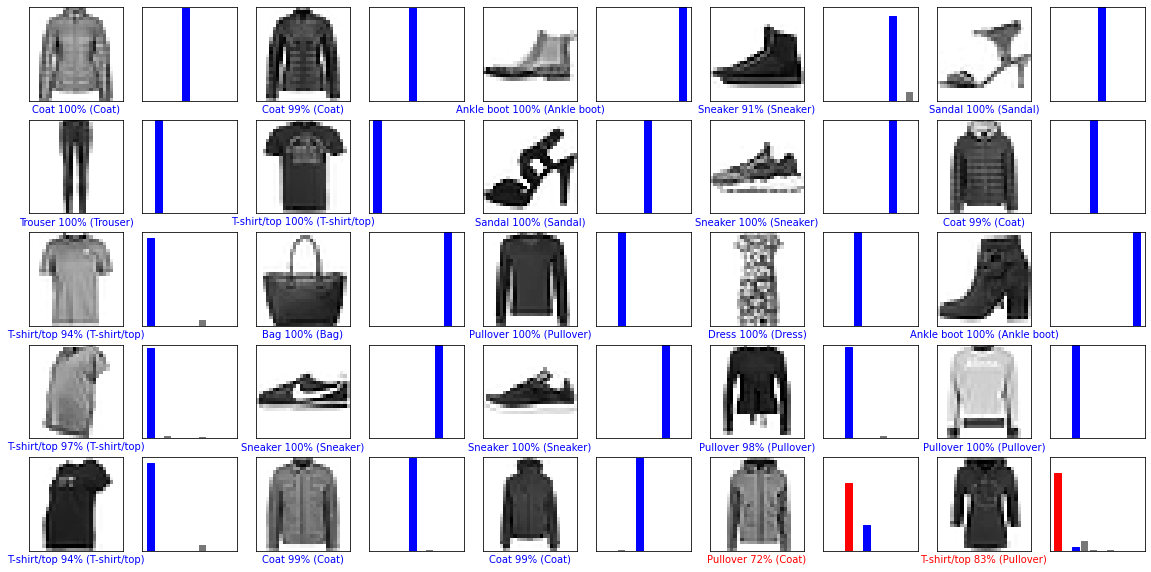

In [ ]:
#Figure with image predictions, blue (correct_case) , red (wrong_case)
import numpy as np

for images_test, labels_test in test_data.take(1):
  images_test = images_test.numpy()
  labels_test = labels_test.numpy()
  predictions = model.predict(images_test)
  
def image_fig(i, arr_predictions, labels_reales, images):
  arr_predictions, label_real, img = arr_predictions[i], labels_reales[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  label_prediccion = np.argmax(arr_predictions)
  if label_prediccion == label_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[label_prediccion],
                                100*np.max(arr_predictions),
                                classes[label_real]),
                                color=color)
  
def percentages_fig(i, arr_predictions, label_real):
  arr_predictions, label_real = arr_predictions[i], label_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  fig = plt.bar(range(10), arr_predictions, color="#777777")
  plt.ylim([0, 1]) 
  label_prediccion = np.argmax(arr_predictions)
  
  fig[label_prediccion].set_color('red')
  fig[label_real].set_color('blue')
  
rows = 5
columns = 5
num_images = rows*columns
plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns, 2*i+1)
  image_fig(i, predictions, labels_test, images_test)
  plt.subplot(rows, 2*columns, 2*i+2)
  percentages_fig(i, predictions, labels_test)